In [10]:
#→ цели и задачи проекта -  отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
#чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

#→ поэтапное описание работы:
    #1.удаление неописанных в описании столбцов: studytime, granular
    #2.переименование столбцов 
    #3.проверка на наличие пустых значений
    

#→ промежуточные выводы;


#→ основные итоги работы.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

#pd.set_option('display.max_rows', 50) # показывать больше строк
#pd.set_option('display.max_columns', 50) # показывать больше колонок

mat = pd.read_csv('stud_math.csv')
display(mat.head(10))
mat.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [26]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [27]:
mat.drop(['studytime, granular'], inplace = True, axis = 1)

In [28]:
mat.columns = ['school','sex', 'age', 'address', 'family_size', 'living_together', 'mother_education', 'father_education', 'mother_job', 'father_job', 'choice_school_reason','guardian', 'traveltime', 'studytime',
       'failures', 'school_support', 'family_support', 'math_paid_lessons', 'activities', 'nursery', 
     'higher', 'internet', 'romantic', 'family_relation',  'freetime', 'go_out', 'health', 'absences', 'math_score']
display(mat.head(5))

,school,sex,age,address,family_size,living_together,mother_education,father_education,mother_job,father_job,...,nursery,higher,internet,romantic,family_relation,freetime,go_out,health,absences,math_score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [29]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'living_together',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'choice_school_reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_support', 'family_support', 'math_paid_lessons',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'family_relation', 'freetime', 'go_out', 'health', 'absences',
       'math_score'],
      dtype='object')

In [30]:
pd.DataFrame(mat.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [31]:
pd.DataFrame(mat.math_score.value_counts())

,math_score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [32]:
display(pd.DataFrame(mat.age.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
          , (mat.age.value_counts()>10).sum())
mat.loc[:, ['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [33]:
display(pd.DataFrame(mat.mother_education.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
          , (mat.mother_education.value_counts()>10).sum())
mat.loc[:, ['mother_education']].info()

,mother_education
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [34]:
display(pd.DataFrame(mat.father_education.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
          , (mat.father_education.value_counts()>10).sum())
mat.loc[:, ['father_education']].info()

,father_education
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: math_score, dtype: float64

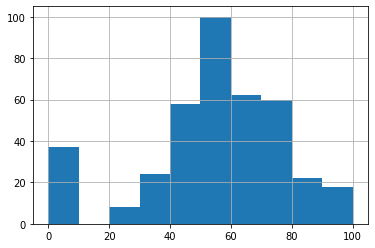

In [35]:
mat.math_score.hist()
mat.math_score.describe()

In [36]:
mat.math_score

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: math_score, Length: 395, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


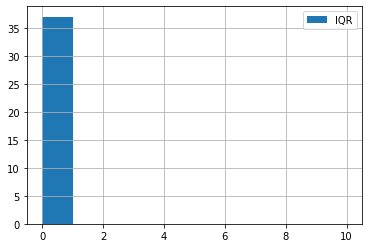

In [37]:
median = mat.math_score.median()
IQR = mat.math_score.quantile(0.75) - mat.math_score.quantile(0.25)
perc25 = mat.math_score.quantile(0.25)
perc75 = mat.math_score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
mat.math_score.loc[mat.math_score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [38]:
display(pd.DataFrame(mat.school.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
          , (mat.school.value_counts()>10).sum())
mat.loc[:, ['school']].info()

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [39]:
display(pd.DataFrame(mat.sex.value_counts()))

,sex
F,208
M,187


In [40]:
display(pd.DataFrame(mat.age.value_counts()))

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [41]:
display(pd.DataFrame(mat.address.value_counts()))

,address
U,295
R,83


In [42]:
pd.DataFrame(mat.living_together.value_counts())

,living_together
T,314
A,36


In [43]:
pd.DataFrame(mat.father_education.value_counts())

,father_education
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [44]:
pd.DataFrame(mat.father_job.value_counts())

,father_job
other,197
services,102
teacher,29
at_home,16
health,15


In [45]:
pd.DataFrame(mat.mother_job.value_counts())

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32


In [46]:
pd.DataFrame(mat.choice_school_reason.value_counts())

,choice_school_reason
course,137
home,104
reputation,103
other,34


In [47]:
pd.DataFrame(mat.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [48]:
pd.DataFrame(mat.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [49]:
pd.DataFrame(mat.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [50]:
pd.DataFrame(mat.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [51]:
pd.DataFrame(mat.school_support.value_counts())

,school_support
no,335
yes,51


In [52]:
pd.DataFrame(mat.family_support.value_counts())

,family_support
yes,219
no,137


In [ ]:
'math_paid_lessons',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'family_relation', 'freetime', 'go_out', 'health', 'absences',
       'math_score'],

In [53]:
pd.DataFrame(mat.math_paid_lessons.value_counts())

,math_paid_lessons
no,200
yes,155


In [54]:
pd.DataFrame(mat.activities.value_counts())

,activities
yes,195
no,186


In [55]:
pd.DataFrame(mat.nursery.value_counts())

,nursery
yes,300
no,79


In [56]:
pd.DataFrame(mat.higher.value_counts())

,higher
yes,356
no,19


In [57]:
pd.DataFrame(mat.internet.value_counts())

,internet
yes,305
no,56


In [59]:
pd.DataFrame(mat.romantic.value_counts())

,romantic
no,240
yes,124


In [60]:
pd.DataFrame(mat.family_relation.value_counts())

,family_relation
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [61]:
pd.DataFrame(mat.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [62]:
pd.DataFrame(mat.go_out.value_counts())

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [63]:
pd.DataFrame(mat.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [64]:
pd.DataFrame(mat.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [65]:
mat.school = mat.school.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [66]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'living_together',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'choice_school_reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_support', 'family_support', 'math_paid_lessons',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'family_relation', 'freetime', 'go_out', 'health', 'absences',
       'math_score'],
      dtype='object')

In [67]:
mat.school = mat.school.apply(lambda x: None if x.strip() == '' else x)

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relation, dtype: float64

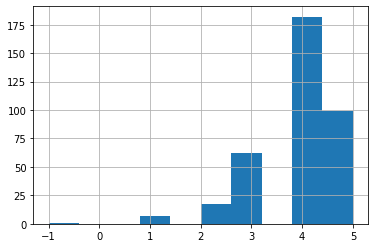

In [68]:
mat.family_relation.hist()
mat.family_relation.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

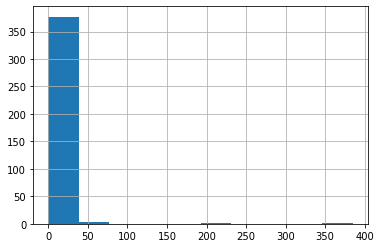

In [69]:
mat.absences.hist()
mat.absences.describe()

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

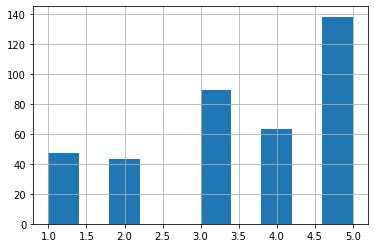

In [70]:
mat.health.hist()
mat.health.describe()